<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis (Continue)
</div>

This is a notebook for exploring more on your dataset. You can use it with same functionality as notebook `3.0-eda.ipynb` during your exploratory data analysis process.

## Import

In [354]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

## Read dataset

In [355]:
cleaned_df = pd.read_csv("../data/processed/21127166_africa_processed.csv")
df_copy = cleaned_df.copy()

In [356]:
def get_data(df: pd.DataFrame, selected_columns: list) -> pd.DataFrame:
    """Returns a DataFrame containing the selected columns from the input DataFrame."""
    return df[selected_columns]

def group_by(df: pd.DataFrame, key: str, columns: list, method: str) -> pd.DataFrame:
    """Returns a DataFrame grouped by the specified key and aggregated using the specified method."""
    return df.groupby(key)[columns].agg(method).reset_index().\
        sort_values(by=columns, ascending=False).reset_index(drop=True).\
        rename(columns={column: f'Avg.{column}' for column in columns})

def plot_top_values(df: pd.DataFrame, x: str, y: str, top_n: int, ax: plt.Axes = None) -> None:
    """Plots a bar chart of the top `top_n` values in the specified column `y` of the input DataFrame, grouped by the specified column `x`.

    Args:
        df: The DataFrame to plot.
        x: The column to group by.
        y: The column to plot.
        top_n: The number of top values to plot.
        ax: The optional Axes object to plot on.
    """

    colors = ['grey'] * len(df)
    colors[df[y].idxmax()] = 'red'

    sns.barplot(x=x, y=y, data=df.head(top_n), palette=colors, ax=ax)

## Make a question

**A possible question is:** What are the global trends in population size and gender composition over time?

**Answering this question will** help us to learn about population growth and gender trends will help us understand how evenly distributed the global population is and how gender composition is changing.

**How we answer this question:** We will collect data on total population by continent and country over time to show population trends.


### Pre-Processing

In [357]:
selected_cols = ['Country', 'Year', 'Total Population', 'Male Population', 'Female Population']
data = df_copy[selected_cols].copy()
data.head()

,Country,Year,Total Population,Male Population,Female Population
0,Algeria,2022,44903225.0,22862237.0,22040988.0
1,Algeria,2021,44177969.0,22497244.0,21680725.0
2,Algeria,2020,43451666.0,22132899.0,21318767.0
3,Algeria,2019,42705368.0,21756903.0,20948465.0
4,Algeria,2018,41927007.0,21362603.0,20564404.0


In [358]:
def get_population_data(data, country=None):
    """Returns the population data of the specified country or total if country is None."""
    if country:
        data = data[data['Country'] == country]
    return data.groupby('Year')[['Total Population', 'Male Population', 'Female Population']].sum().reset_index()

def plot_population_data(data, ax):
    """Plots the population data."""
    melted_data = data.melt(id_vars='Year', var_name='Population', value_name='Count')
    sns.lineplot(x='Year', y='Count', hue='Population', data=melted_data, ax=ax)

### Analyzing to get answer

In [359]:
# Get the population data
total_population = get_population_data(data)
algeria_population = get_population_data(data, 'Algeria')

In [360]:
total_population.head(10)

,Year,Total Population,Male Population,Female Population
0,1995,665956879.0,331346584.0,334610295.0
1,1996,683174627.0,339796248.0,343378379.0
2,1997,700515518.0,348421251.0,352094267.0
3,1998,717746662.0,357067120.0,360679542.0
4,1999,735181043.0,365791781.0,369389262.0
5,2000,753081139.0,374762465.0,378318674.0
6,2001,771490802.0,383989278.0,387501524.0
7,2002,790446263.0,393503801.0,396942462.0
8,2003,809972779.0,403327672.0,406645107.0
9,2004,830089936.0,413440390.0,416649546.0


In [361]:
algeria_population.head(10)

,Year,Total Population,Male Population,Female Population
0,1995,28478022.0,14462522.0,14015500.0
1,1996,28984634.0,14736488.0,14248146.0
2,1997,29476031.0,15025934.0,14450097.0
3,1998,29924668.0,15272209.0,14652459.0
4,1999,30346083.0,15482799.0,14863284.0
5,2000,30774621.0,15698203.0,15076418.0
6,2001,31200985.0,15912853.0,15288132.0
7,2002,31624696.0,16126874.0,15497822.0
8,2003,32055883.0,16346159.0,15709724.0
9,2004,32510186.0,16578139.0,15932047.0


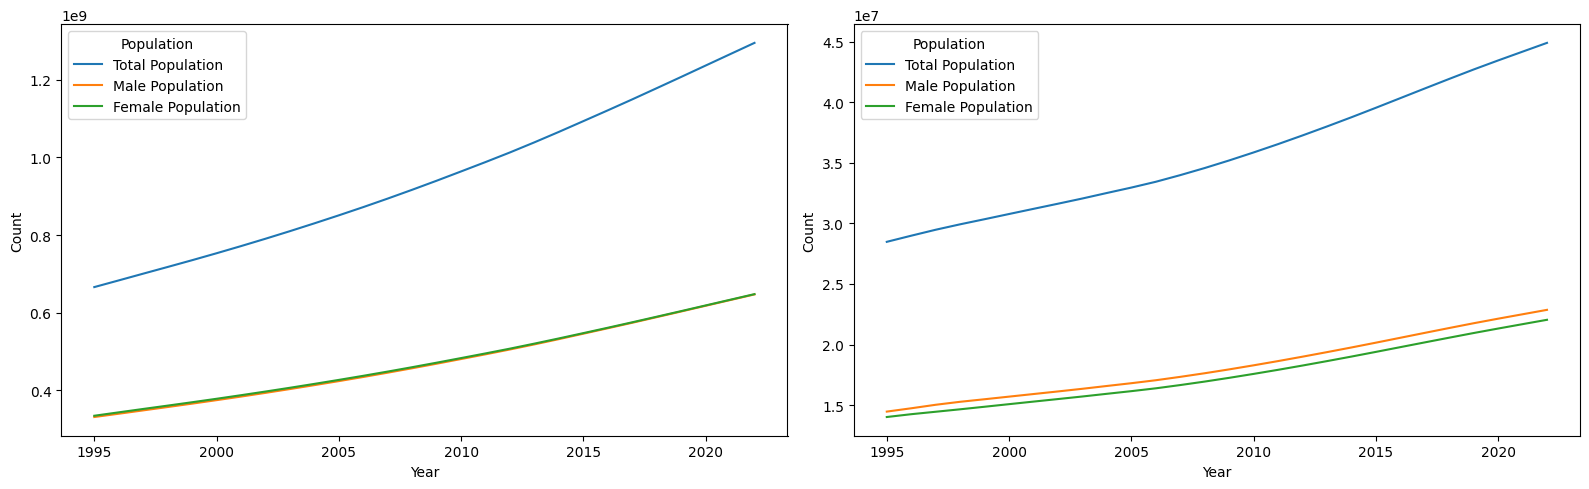

In [362]:
# Create the subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot the data
plot_population_data(total_population, ax[0])
plot_population_data(algeria_population, ax[1])

plt.tight_layout()
plt.show()

### Conclusion

In many African countries, the total female population was higher than the total male population before 2015. After 2015, the female population line crossed the male population line and became equal, or even slightly higher. However, there are some African countries where the total male population is still higher than the female population.

## Making a question


**A possible question is:** What is the difference in population rates between males and females in different countries?

**Answering this question will** help us to understand the gender gap in population size.

**How we answer this question:** We will compare the average male population and female population for countries across all years, and calculate the difference rate between them.


### Pre-Processing

In [363]:
selected_cols = ['Country', 'Total Population', 'Male Population', 'Female Population']
data = df_copy[selected_cols].copy()
data.head()

,Country,Total Population,Male Population,Female Population
0,Algeria,44903225.0,22862237.0,22040988.0
1,Algeria,44177969.0,22497244.0,21680725.0
2,Algeria,43451666.0,22132899.0,21318767.0
3,Algeria,42705368.0,21756903.0,20948465.0
4,Algeria,41927007.0,21362603.0,20564404.0


### Analyzing to get answer

Step 01: Comparing the average male population and female population for countries across all years

In [364]:
avg_male_population = group_by(data, 'Country', ['Male Population'], 'mean')
avg_female_population = group_by(data, 'Country', ['Female Population'], 'mean')

In [365]:
avg_female_population.head()

,Country,Avg.Female Population
0,Nigeria,7.829816e+07
1,Ethiopia,4.346507e+07
2,"Egypt, Arab Rep.",4.252790e+07
3,South Africa,2.676592e+07
4,Tanzania,2.282646e+07


In [366]:
avg_male_population.head()

,Country,Avg.Male Population
0,Nigeria,7.950886e+07
1,Ethiopia,4.391138e+07
2,"Egypt, Arab Rep.",4.359680e+07
3,South Africa,2.477647e+07
4,Tanzania,2.222470e+07


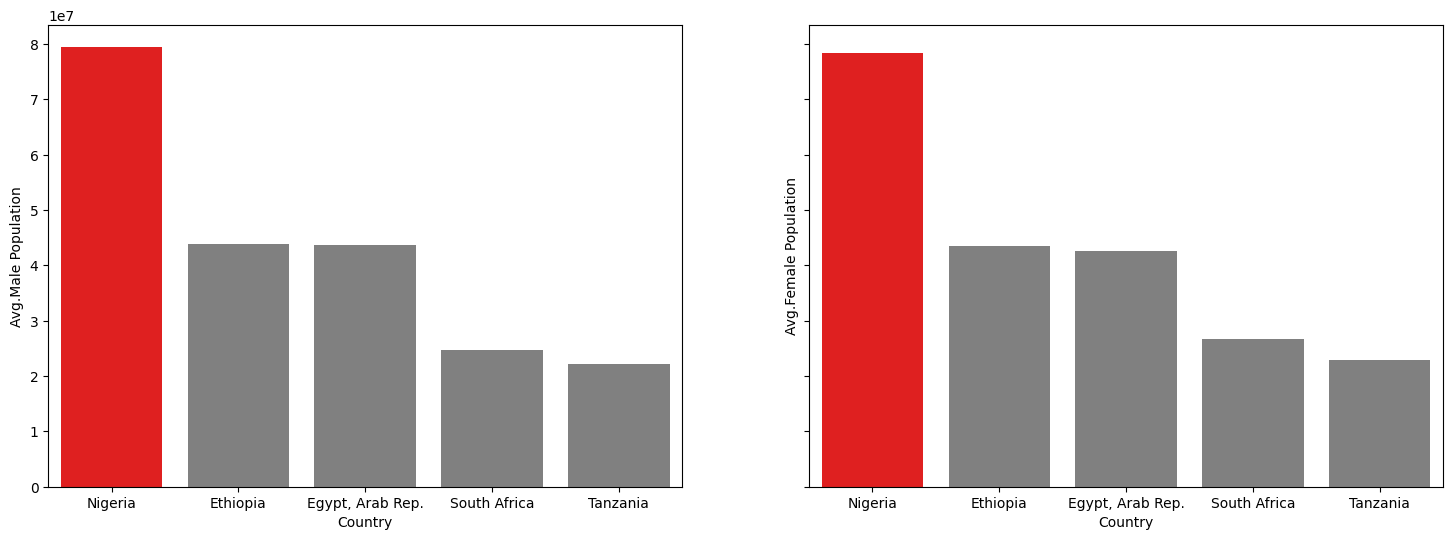

In [367]:
fig, ax = plt.subplots(1,2, figsize = (18, 6), sharey=True)

plot_top_values(avg_male_population, 'Country', 'Avg.Male Population', 5, ax=ax[0])
plot_top_values(avg_female_population, 'Country', 'Avg.Female Population', 5, ax=ax[1])

Step 02: Calculating the difference rate between male population and female population


In [368]:
population_rate = data.groupby('Country')[['Total Population', 'Male Population', 'Female Population']].mean().reset_index()
population_rate['Difference Rate'] = abs(population_rate['Male Population'] - population_rate['Female Population']) / population_rate['Total Population']

In [369]:
population_rate.head()

,Country,Total Population,Male Population,Female Population,Difference Rate
0,Algeria,3.571866e+07,1.820446e+07,1.751420e+07,0.019325
1,Angola,2.312858e+07,1.139805e+07,1.173053e+07,0.014376
2,Benin,9.271713e+06,4.620473e+06,4.651240e+06,0.003318
3,Botswana,2.055773e+06,1.007011e+06,1.048762e+06,0.020309
4,Burkina Faso,1.581270e+07,7.841559e+06,7.971141e+06,0.008195


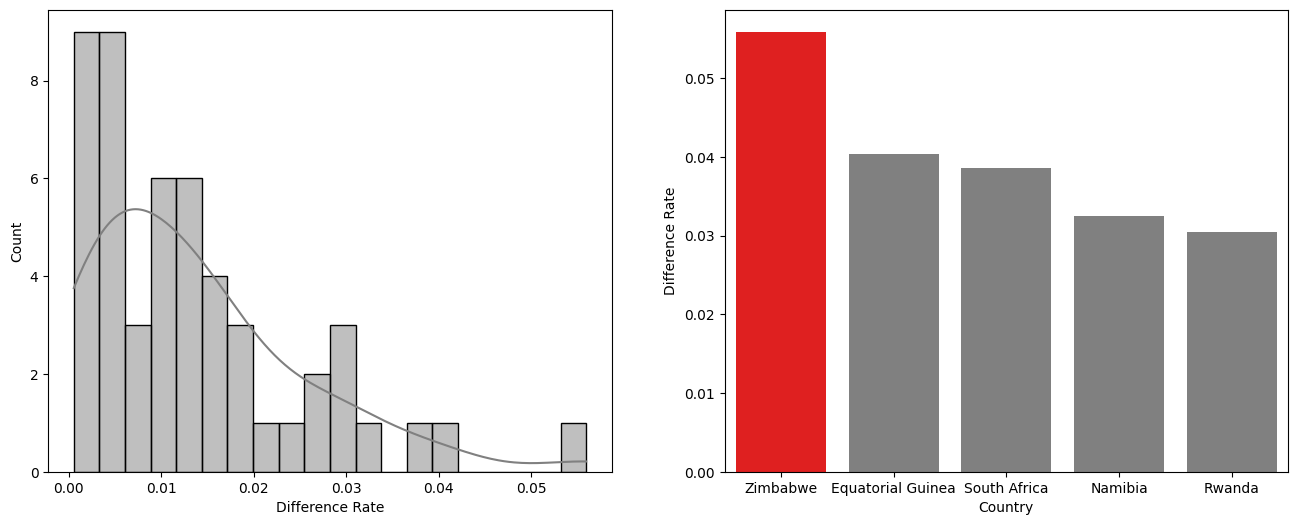

In [370]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=population_rate, x='Difference Rate', bins=20, kde=True, color='grey', ax=ax[0])
plot_top_values(df=population_rate.sort_values(by='Difference Rate', ascending=False).reset_index(drop=True), x='Country', y='Difference Rate', top_n=5, ax=ax[1])

### Conclusion

The five countries with the highest male and female populations in Africa are the same. However, male populations are higher than female populations in all of these countries except for South Africa and Tanzania. 

The difference rate between male and female populations in all African countries is almost always less than 0.05, which means that the distribution of males and females in the population is relatively equal. Zimbabwe is the only African country with a difference rate greater than 0.05.

## Make a question


**A possible question is:** What is the economic situation of the Africa continent?

**Answering this question will** help us to understand economic statistics and make decisions for the future.

**How we answer this question:** We will calculate the average of all economic statistics for all countries across all years, and analyze the distribution of each statistic by continent and the correlation between them.

### Pre-Processing

In [371]:
from sklearn.preprocessing import StandardScaler

In [372]:
selected_cols = ['Country', 'GDP in USD', 'National Income per Capita', 'Net income from Abroad', 'Agriculture value added(in USD)']
data = df_copy[selected_cols].copy()
data.head()

,Country,GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD)
0,Algeria,1.919129e+11,2.052086,-1.116459e+09,2.184752e+10
1,Algeria,1.634722e+11,2.052086,-2.899985e+09,1.990395e+10
2,Algeria,1.457437e+11,-5.507740,-2.944261e+09,2.008932e+10
3,Algeria,1.717603e+11,-1.525483,-4.199272e+09,2.118960e+10
4,Algeria,1.749109e+11,-0.533998,-4.403811e+09,2.076927e+10


In [373]:
def plot_histograms(data, columns, bins=20, color='grey'):
    fig, ax = plt.subplots(2, 2, figsize=(16, 8))

    for i, column in enumerate(columns):
        sns.histplot(data=data, x=column, bins=bins, kde=True, color=color, ax=ax[i//2, i%2])

    plt.tight_layout()
    plt.show()

### Analyzing to get answer

Step 01: Calculating the average of all economic statistics for all countries across all years

In [374]:
avg_data = data.groupby('Country')[['GDP in USD', 'National Income per Capita', 'Net income from Abroad', 'Agriculture value added(in USD)']].mean().reset_index()

In [375]:
avg_data.head()

,Country,GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD)
0,Algeria,1.269419e+11,2.717375,-2.725553e+09,1.284619e+10
1,Angola,5.657612e+10,2.733394,-5.003080e+09,4.341275e+09
2,Benin,8.915341e+09,2.554655,-6.099780e+07,2.407978e+09
3,Botswana,1.118704e+10,2.942608,-5.045860e+08,2.437690e+08
4,Burkina Faso,9.369221e+09,3.008860,-3.169519e+08,2.116837e+09


Step 02: Analyzing the distribution of each statistic by continent and the correlation between them.

In [376]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(avg_data[['GDP in USD', 'National Income per Capita', 'Net income from Abroad', 'Agriculture value added(in USD)']])
scaled_data = pd.DataFrame(scaled_data, columns=['GDP in USD', 'National Income per Capita', 'Net income from Abroad', 'Agriculture value added(in USD)'])

In [377]:
scaled_data.head()

,GDP in USD,National Income per Capita,Net income from Abroad,Agriculture value added(in USD)
0,1.510318,0.124042,-0.748573,0.809640
1,0.382290,0.127028,-1.808110,-0.065278
2,-0.381757,0.093703,0.491015,-0.264161
3,-0.345339,0.166036,0.284652,-0.486797
4,-0.374480,0.178389,0.371942,-0.294111


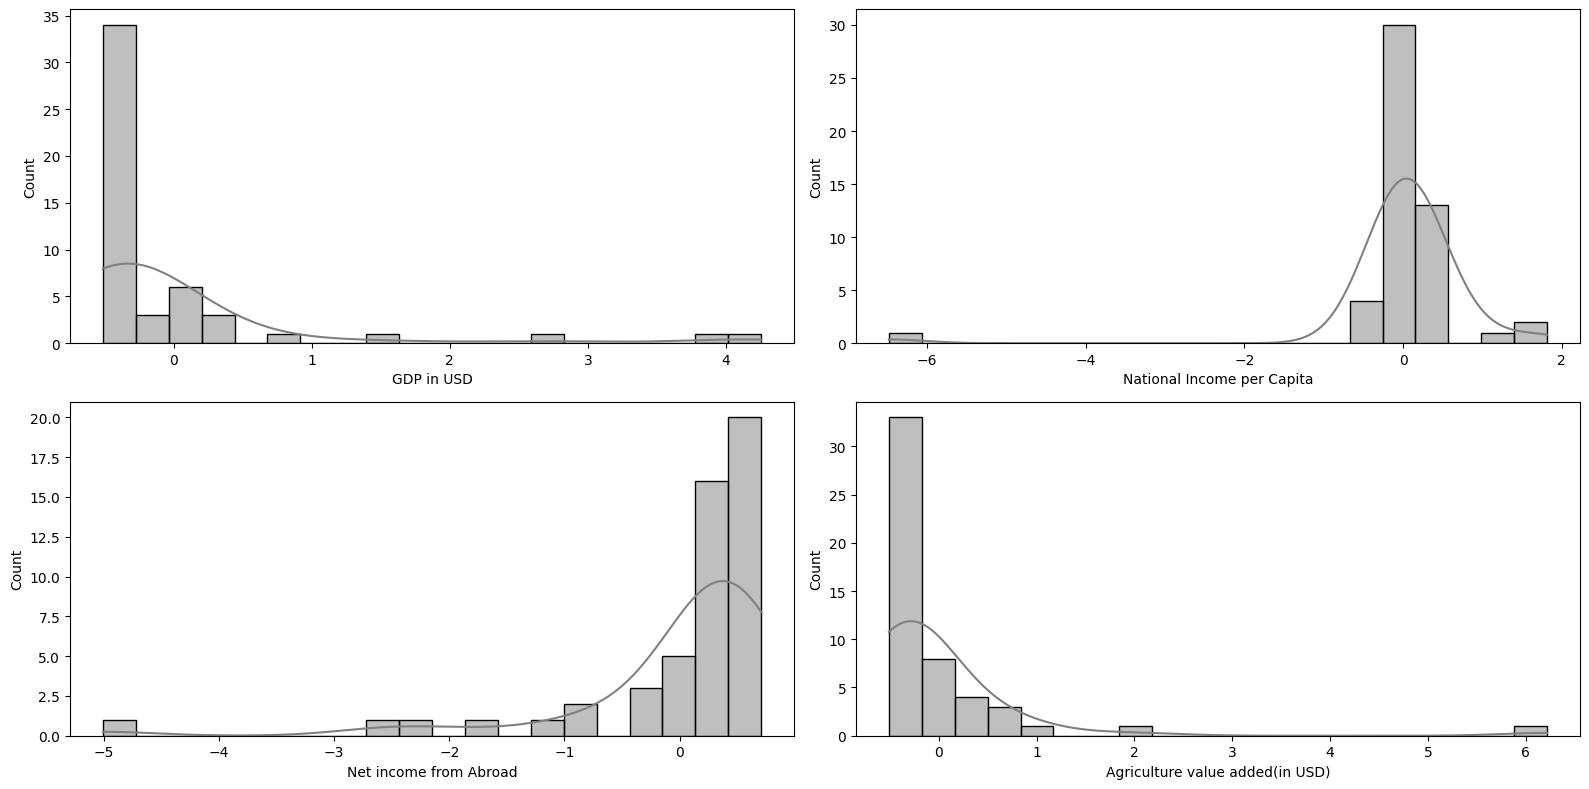

In [378]:
# Define the columns to plot
columns = ['GDP in USD', 'National Income per Capita', 'Net income from Abroad', 'Agriculture value added(in USD)']

# Call the function
plot_histograms(scaled_data, columns)


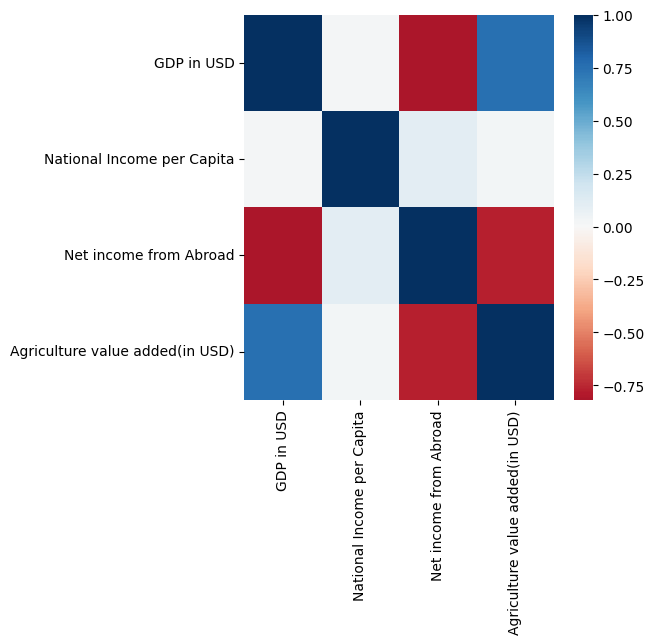

In [379]:
# Create a heatmap of the correlation coefficients between the attributes
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(scaled_data.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

### Conclusion

There are two left-skewed distributions: GDP in the USA and agricultural value added (in USD). There is one right-skewed distribution: net income from abroad. There is a symmetric distribution: national income per capita.

GDP in the USA and net income from abroad have a higher correlation than other pairs of variables. The correlation coefficient between these two variables is positive. Agricultural value added (in USD) has a negative correlation with all other variables.

### Making a question


**A possible question is:** What is the status of education in all African countries?

**Answering this question will** help us to understand the school enrollment rates at all levels and make decisions for future improvement.

**How we answer this question:** We will calculate the average school enrollment rate at all levels for all African countries across all years and analyze the correlation between primary enrollment and primary completion rate.

### Pre-Processing

In [380]:
selected_cols = ['Country', 'School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate']
data = get_data(df_copy, selected_cols)
data.head()

,Country,"School enrollment, primary","School enrollment, tertiary",Primary completion rate
0,Algeria,97.409735,10.196134,67.268794
1,Algeria,97.409735,53.741741,67.268794
2,Algeria,111.281151,52.498619,103.663528
3,Algeria,108.845848,52.619942,101.364632
4,Algeria,109.882820,51.365669,105.143959


### Analyzing to get answer

Step 01: Calculating the average school enrollment rate at all levels for all African countries across all years

In [381]:
avg_enrollment_primary = group_by(data, 'Country', ['School enrollment, primary'], 'mean')
avg_enrollment_tertiary = group_by(data, 'Country', ['School enrollment, tertiary'], 'mean')

In [382]:
avg_enrollment_primary.head()

,Country,"Avg.School enrollment, primary"
0,Malawi,132.755930
1,Rwanda,127.845799
2,Madagascar,123.262609
3,Togo,119.367457
4,Namibia,117.640080


In [383]:
avg_enrollment_tertiary.head()

,Country,"Avg.School enrollment, tertiary"
0,Tunisia,26.863156
1,Algeria,26.846871
2,Mauritius,25.040505
3,"Egypt, Arab Rep.",24.306490
4,Morocco,18.920886


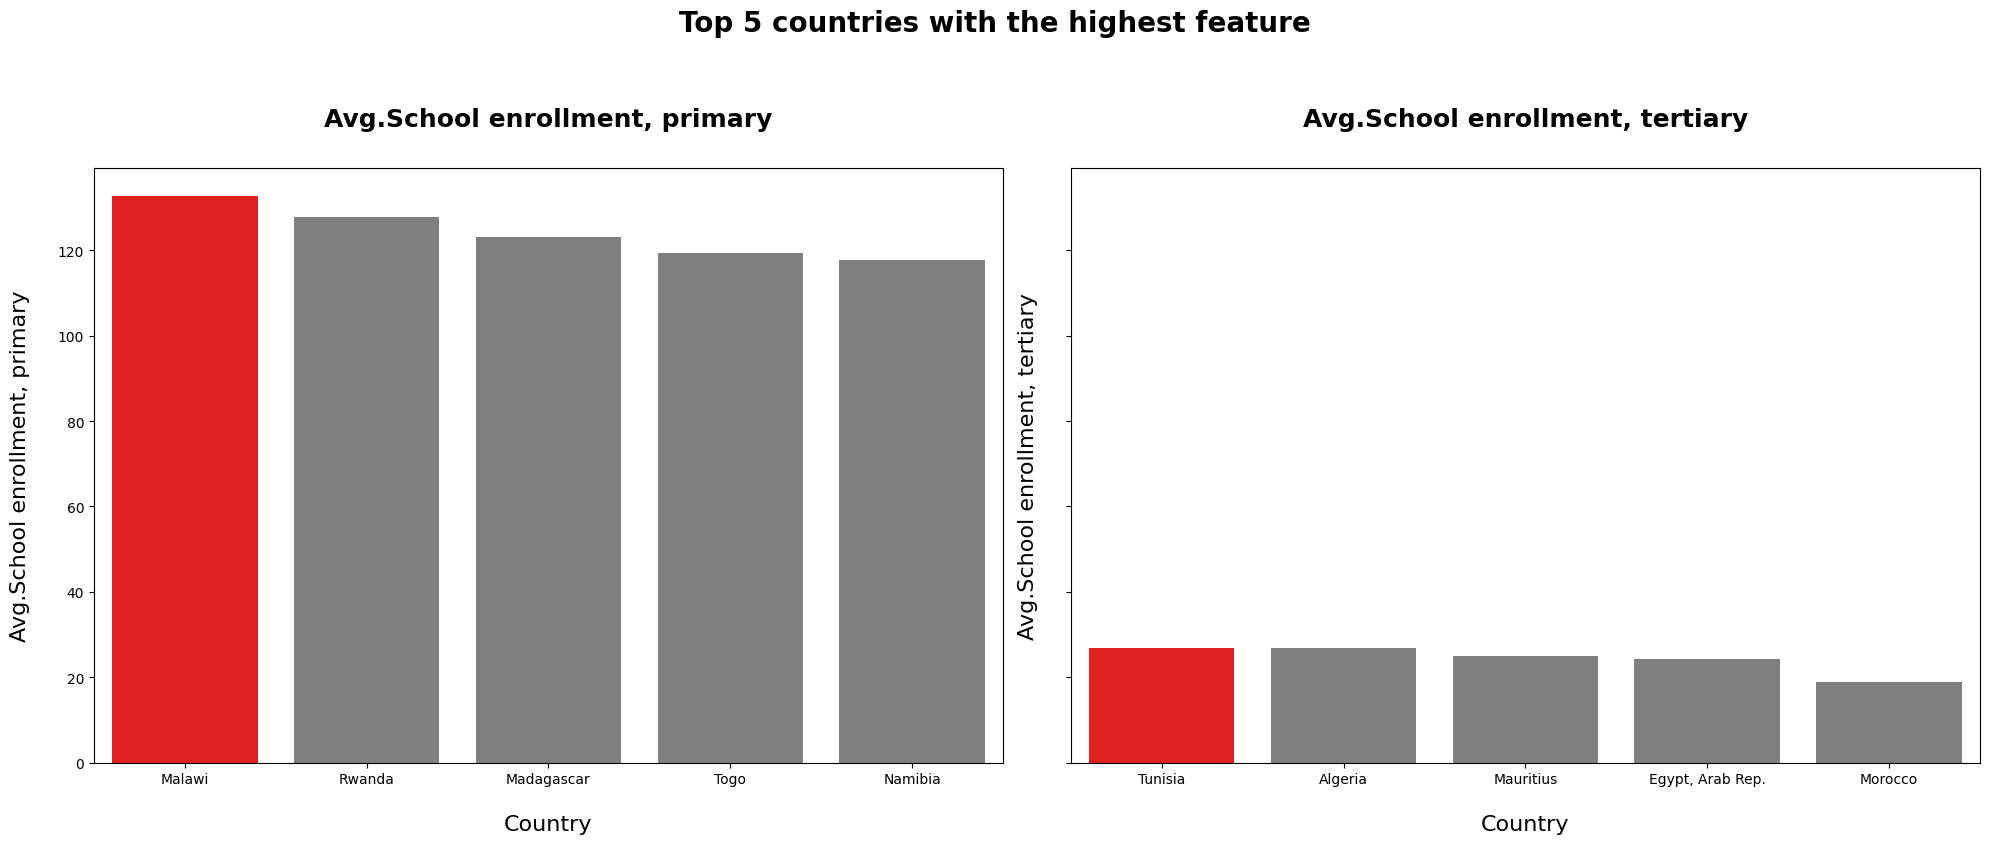

In [384]:
# Plot the top 5 countries with the highest renewable energy consumption
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

ax[0].set_title('Avg.School enrollment, primary', fontsize=18, fontweight='bold', pad=30)
ax[0].set_xlabel('Avg.School enrollment, primary', fontsize=16, labelpad=20)
ax[0].set_ylabel('Country', fontsize=16, labelpad=20)

plot_top_values(avg_enrollment_primary, x='Country', y='Avg.School enrollment, primary', top_n=5, ax=ax[0])

# Plot the top 5 countries with the highest GDP
ax[1].set_title('Avg.School enrollment, tertiary', fontsize=18, fontweight='bold', pad=30)
ax[1].set_xlabel('Avg.School enrollment, tertiary', fontsize=16, labelpad=20)
ax[1].set_ylabel('Country', fontsize=16, labelpad=20)

plot_top_values(avg_enrollment_tertiary,  x='Country', y='Avg.School enrollment, tertiary', top_n=5, ax=ax[1])

# Add a suptitle to the figure
plt.suptitle('Top 5 countries with the highest feature', fontsize=20, fontweight='bold', y=1.05)

# Tighten the layout and show the plot
plt.tight_layout()
plt.show()

Step 02: Analyzing the correlation between primary enrollment and primary completion rate.

Correlation coefficient: 0.5248102581861827


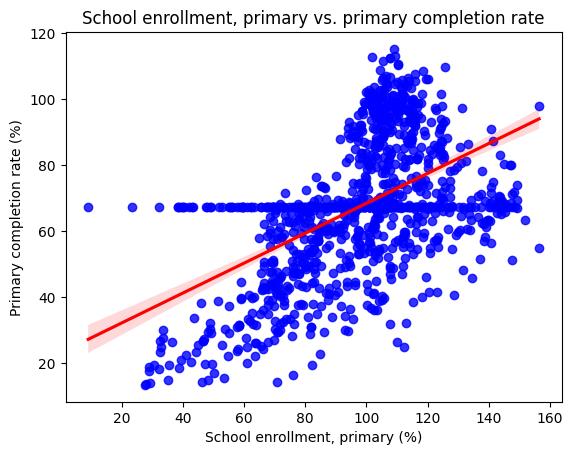

In [385]:
# Create a DataFrame with the two attributes
df = data[['School enrollment, primary', 'Primary completion rate']].dropna()

# Calculate the correlation between the two attributes
correlation = df.corr().iloc[0, 1]

# Print the correlation coefficient
print('Correlation coefficient:', correlation)

# Create a scatter plot with a regression line
sns.regplot(x='School enrollment, primary', y='Primary completion rate', data=df, color='blue', line_kws={'color':'red'})

# Label the axes and title
plt.xlabel('School enrollment, primary (%)')
plt.ylabel('Primary completion rate (%)')
plt.title('School enrollment, primary vs. primary completion rate')

# Show the plot
plt.show()

### Conclusion

Primary school enrollment is three times higher than tertiary school enrollment. Additionally, the primary school completion rate has a low correlation with primary school enrollment. This indicates that many children enroll in primary school, but only half of them complete their primary education.

## Make a question


**A possible question is:** What is the average resource consumption rate across all sectors in all African countries?

**Answering this question will** help us to understand the current state of resource consumption in Africa and make informed decisions for future improvement.

**How we answer this question:** We will calculate the average resource consumption rate across all sectors for all African countries across all years.


### Pre-Processing

In [386]:
selected_cols = ['Country', 'Electric Power Consumption(kWH per capita)', 'Renewable Energy Consumption (%)', 'Fossil Fuel Consumption (%)']
data = df_copy[selected_cols]
data.head()

,Country,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%)
0,Algeria,712.608182,60.381415,41.345309
1,Algeria,712.608182,60.381415,41.345309
2,Algeria,712.608182,0.150000,41.345309
3,Algeria,712.608182,0.160000,41.345309
4,Algeria,712.608182,0.190000,41.345309


### Analyzing to get answer

In [387]:
# Group by 'Country' and calculate the mean and sum
avg_electric_power_consumption = data.groupby('Country')['Electric Power Consumption(kWH per capita)'].mean().reset_index().rename(columns={'Electric Power Consumption(kWH per capita)': 'Avg.Electric Power Consumption(kWH per capita)'})
sum_electric_power_consumption = data.groupby('Country')['Electric Power Consumption(kWH per capita)'].sum().reset_index().rename(columns={'Electric Power Consumption(kWH per capita)': 'Sum.Electric Power Consumption(kWH per capita)'})

# Calculate the percent
percent = [i / j * 100 for i, j in zip(avg_electric_power_consumption['Avg.Electric Power Consumption(kWH per capita)'].tolist(), sum_electric_power_consumption['Sum.Electric Power Consumption(kWH per capita)'].tolist())]

# Create a DataFrame to hold the results
result = pd.DataFrame({
    'Country': avg_electric_power_consumption['Country'],
    'Avg Electric Power Consumption': avg_electric_power_consumption['Avg.Electric Power Consumption(kWH per capita)'],
    'Sum Electric Power Consumption': sum_electric_power_consumption['Sum.Electric Power Consumption(kWH per capita)'],
    'Percent': percent
}).sort_values(by='Percent', ascending=False).reset_index(drop=True)

# Display the first 10 rows
result.head(10)

,Country,Avg Electric Power Consumption,Sum Electric Power Consumption,Percent
0,Zimbabwe,760.917749,21305.696972,3.571429
1,Benin,253.625442,7101.512390,3.571429
2,Kenya,300.570024,8415.960670,3.571429
3,Mauritius,1361.896734,38133.108558,3.571429
4,Namibia,1177.234897,32962.577114,3.571429
5,Niger,351.636819,9845.830927,3.571429
6,Sao Tome and Principe,712.608182,19953.029109,3.571429
7,Mali,712.608182,19953.029109,3.571429
8,Mauritania,712.608182,19953.029109,3.571429
9,Morocco,660.799718,18502.392106,3.571429


In [388]:
avg_renewable_energy_consumption = group_by(data, 'Country', ['Renewable Energy Consumption (%)'], 'mean')
avg_renewable_energy_consumption.head(10)

,Country,Avg.Renewable Energy Consumption (%)
0,Uganda,92.489693
1,Somalia,92.357193
2,Ethiopia,91.086172
3,Burundi,90.849693
4,Central African Republic,90.490765
5,Liberia,89.054693
6,Tanzania,87.550101
7,Guinea-Bissau,87.224693
8,Rwanda,86.675051
9,Mozambique,85.756887


In [389]:
avg_fossil_fuel_consumption = group_by(data, 'Country', ['Fossil Fuel Consumption (%)'], 'mean')
avg_fossil_fuel_consumption.head(10)

,Country,Avg.Fossil Fuel Consumption (%)
0,Algeria,83.096983
1,Libya,82.620944
2,"Egypt, Arab Rep.",80.156158
3,Tunisia,74.091404
4,Morocco,73.686352
5,South Africa,73.455267
6,Mauritius,66.138795
7,Botswana,58.359208
8,Namibia,57.863663
9,Senegal,47.701697


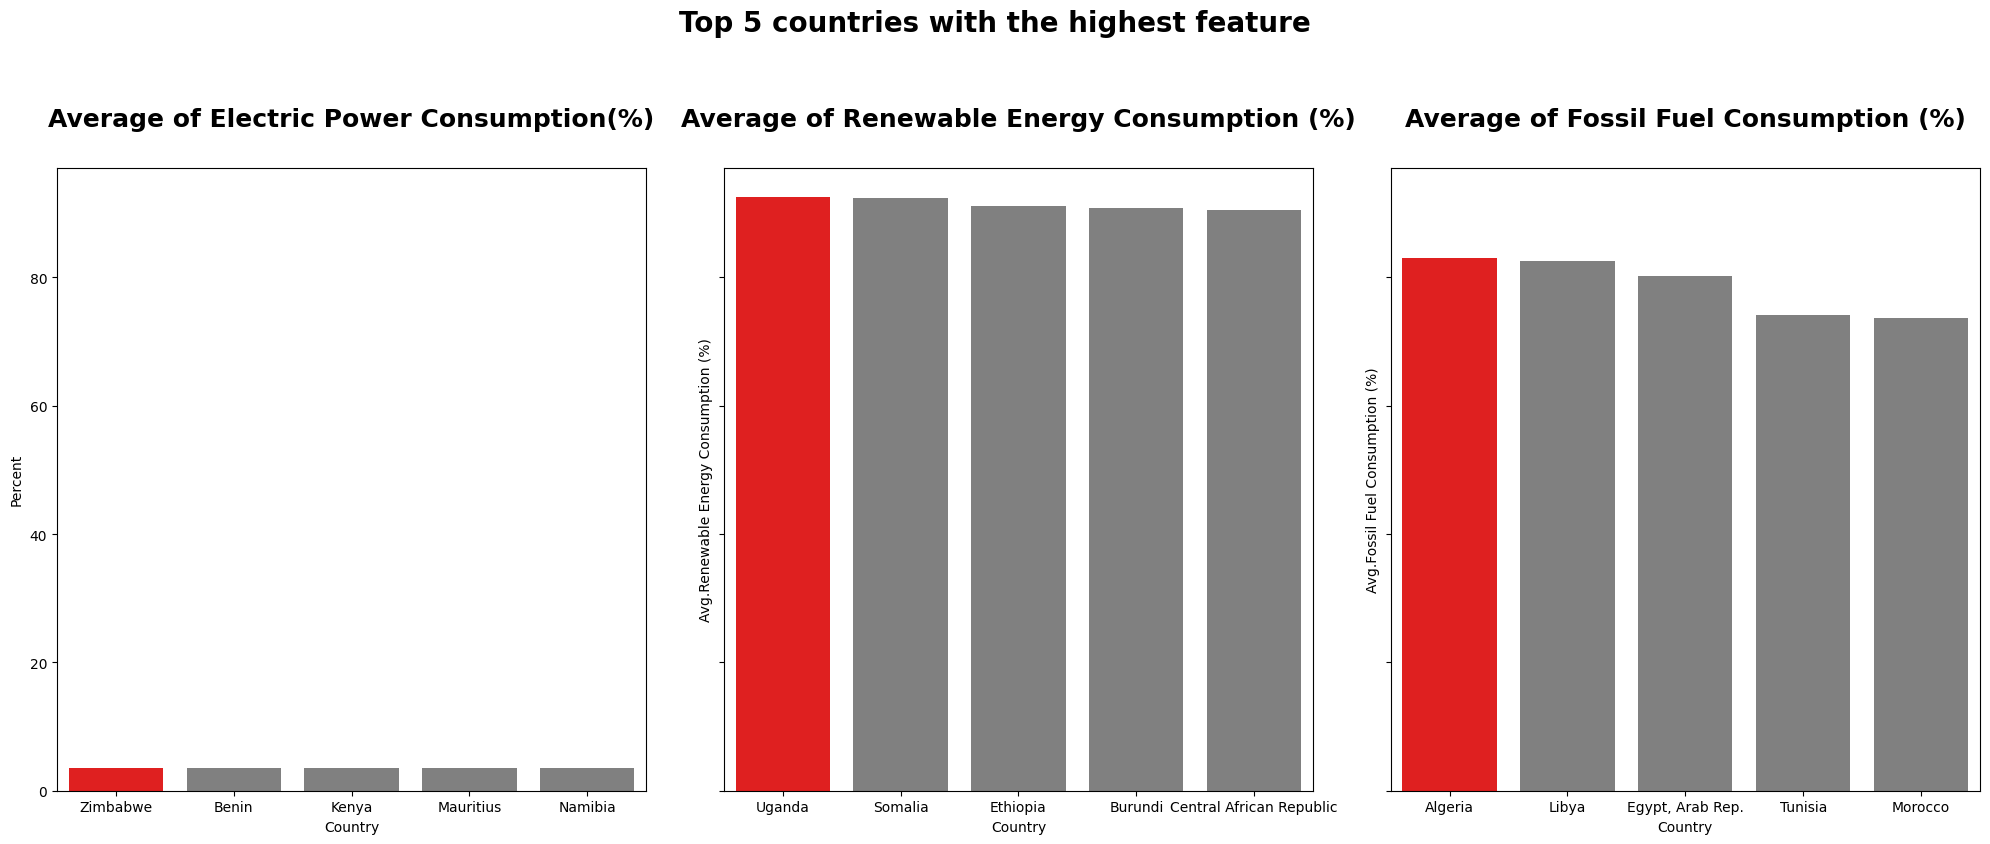

In [390]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

plot_top_values(result, x='Country', y='Percent', top_n=5, ax=ax[0])
plot_top_values(avg_renewable_energy_consumption, x='Country', y='Avg.Renewable Energy Consumption (%)', top_n=5, ax=ax[1])
plot_top_values(avg_fossil_fuel_consumption, x='Country', y='Avg.Fossil Fuel Consumption (%)', top_n=5, ax=ax[2])

ax[0].set_title('Average of Electric Power Consumption(%)', fontsize=18, fontweight='bold', pad=30)
ax[1].set_title('Average of Renewable Energy Consumption (%)', fontsize=18, fontweight='bold', pad=30)
ax[2].set_title('Average of Fossil Fuel Consumption (%)', fontsize=18, fontweight='bold', pad=30)

plt.suptitle('Top 5 countries with the highest feature', fontsize=20, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

### Conclusion

Renewable energy consumption is higher than fossil fuel consumption in all African countries.

## Make a question


**A possible question is:** What is the employment rate across all sectors in all African countries, and how is it distributed across industry, agriculture, and gender?

**Answering this question will** help us to understand the current state of employment and make informed decisions for future improvement.

**How we answer this question:** We will show the distribution of employment rate by sector and gender for all African countries.


### Pre-Processing

In [391]:
selected_cols = ['Country', 'Employment in Industry(%)', 'Employment in Agriculture(%)', 'Female Employment in Agriculture(%)', 'Female Employment in Industry(%)', 'Unemployment(%)']
data = df_copy[selected_cols].copy()
data.head()

,Country,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%)
0,Algeria,13.74374,48.164092,49.723269,10.118534,11.550
1,Algeria,31.03555,10.323790,3.929019,23.940450,11.747
2,Algeria,30.49272,10.524500,3.867479,24.429170,12.248
3,Algeria,30.46512,9.940742,3.754027,23.812240,10.495
4,Algeria,30.68305,10.007310,3.807302,24.043400,10.416


### Analyzing to get answer

In [392]:
data.describe()

,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),Unemployment(%)
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,13.743740,48.164092,49.723269,10.118534,9.222008
std,7.674594,21.623268,24.430893,8.170177,7.262447
min,2.195539,1.184986,0.913054,0.206030,0.320000
25%,7.575027,32.196838,29.076730,3.919370,3.462750
50%,12.826850,48.164092,49.723269,8.354249,6.304500
75%,18.248188,66.358423,70.288610,13.668938,14.364500
max,39.834960,92.591690,96.987240,43.624750,31.840000


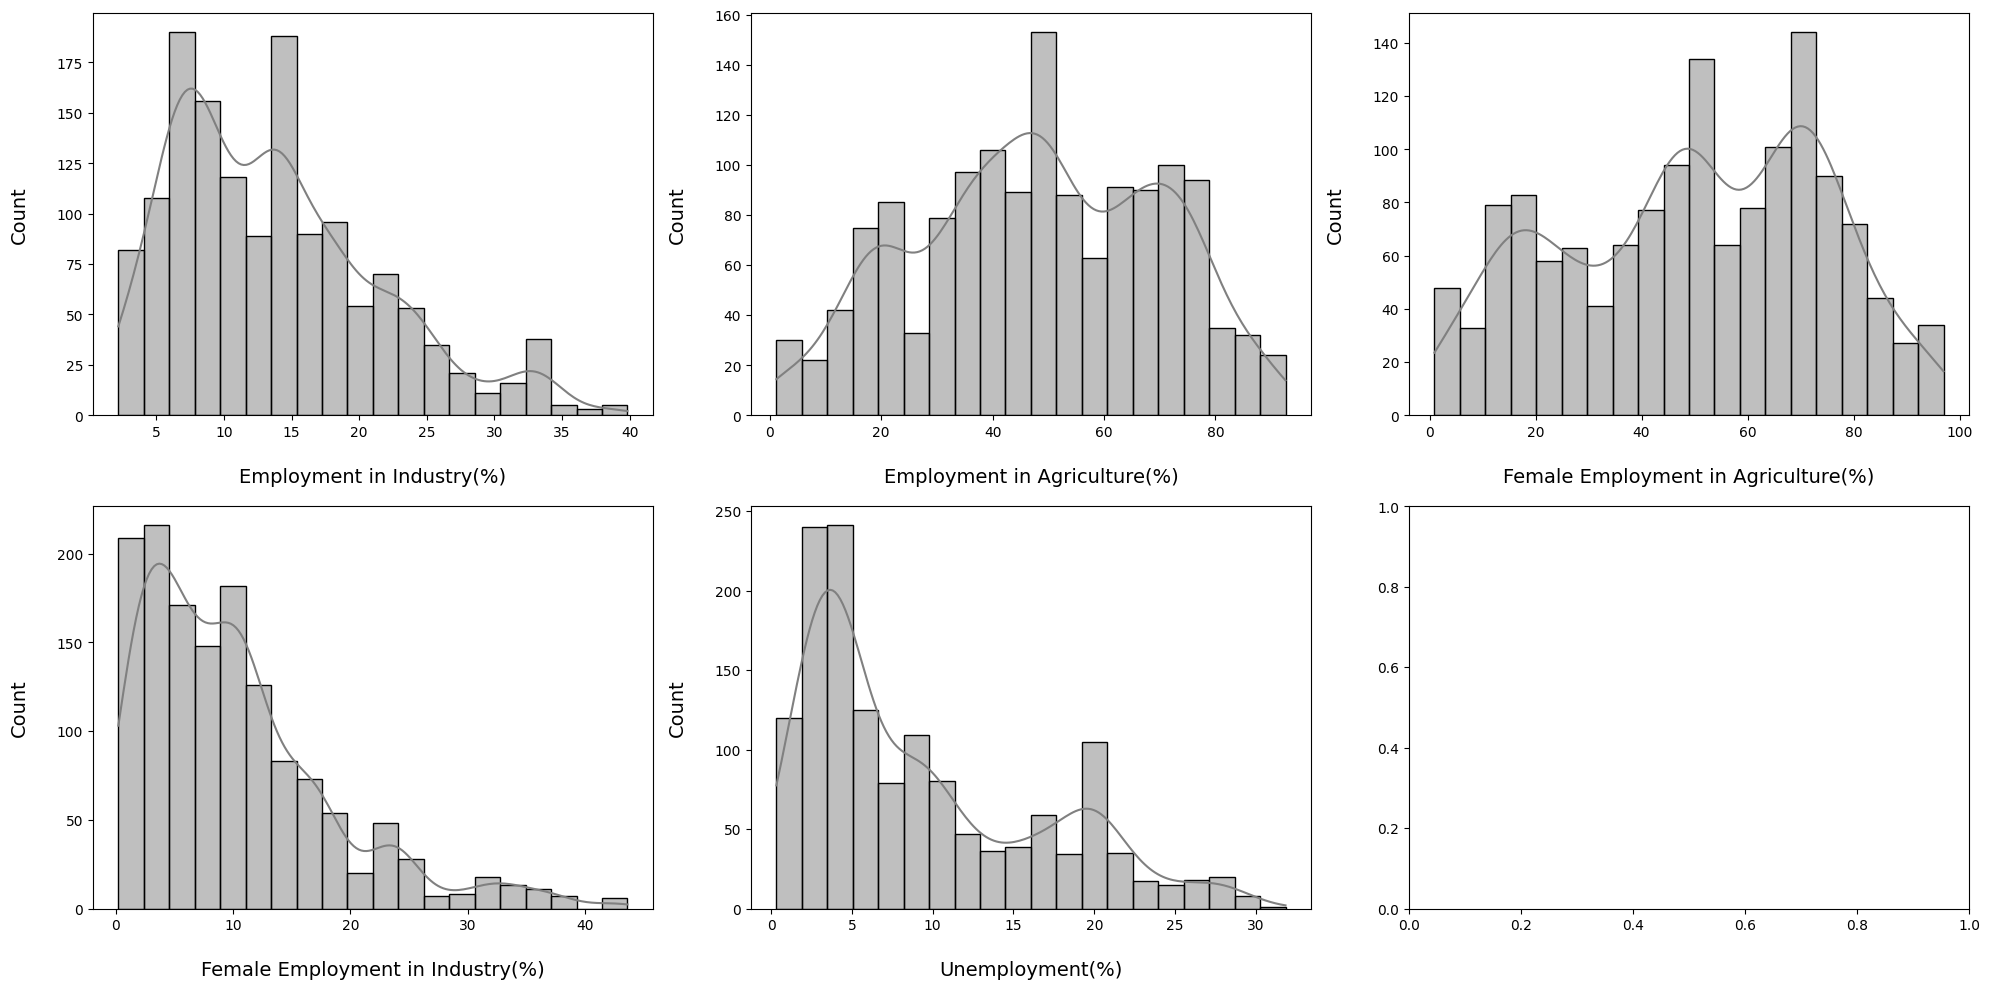

In [393]:
def hist_plots(df, columns, bins=20, color='grey'):
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))

    for i, column in enumerate(columns):
        sns.histplot(data=df, x=column, bins=bins, kde=True, color=color, ax=ax[i//3, i%3])
        ax[i//3, i%3].set_xlabel(column, fontsize=14, labelpad=20)
        ax[i//3, i%3].set_ylabel('Count', fontsize=14, labelpad=20)

    plt.tight_layout()
    plt.show()
    
hist_plots(data, columns=data.columns[1:].to_list())


### Conclusion

Employment in agriculture is likely to be higher than employment in industry in African countries, with the percentage of workers employed in agriculture ranging from 20% to 60% and the percentage of workers employed in industry ranging from 5% to 15%. 

Additionally, women are more likely to be employed in agriculture than in industry, with the percentage of female workers employed in agriculture ranging from 40% to 80%. 

The unemployment rate in all African countries is likely to be between 0% and 5%.